<h1 style="display: inline-block; margin-right: -30px;">手書き数字認識AIを作ってみよう</h1>
<img src="img/magician.png" style="display: inline-block; vertical-align: middle; width: 80px; height: auto;" />


このワークブックでは、手書き数字を認識するAIを作成していきます。  
MNISTデータセットを使用して、データの分析、前処理、モデルの訓練、予測を行います。  
そして最後にGradioを用いたインタラクティブなゲームを作成してAIを構築する作業の一連のプロセスを学びます。

- データセットの準備と分析
    - データセットの概要確認
    - データセットの分布確認
    - サンプルデータの表示
    - 特定の数字のサンプル表示
- データセットの前処理
- AIの構築
- AIの評価
    - 学習過程の可視化
    - テストデータを使った予測
- 【応用】手書き数字認識ゲームの作成

<hr style="border-top: 2px solid #71EB8B;">

## <span style="color:#E5004C"> データセットの準備と分析 <span>
<p style="font-weight: bold; color: black; border: 3px solid #71EB8B; padding: 5px; display: inline-block;">
    参照: スライド 28ページ
</p>
<br>
<img src="img/dataset_analysis.png" style="display: inline-block; vertical-align: middle; width: 600px; height: auto;" />
    
まずは必要なライブラリをインポートし、データセットを準備します。  
MNISTは手書き数字のデータセットで、AIモデルの訓練に広く使用されています。

In [1]:
# 実行に必要なライブラリをインストールします
! pip install japanize_matplotlib
! pip install gradio==3.50.0
! pip install pydot
! pip install typing_extensions
! pip install sqlalchemy
! pip install pymysql
! pip install google-cloud-storage

In [2]:
# ユーティリティライブラリからmnistをインポート
from utils import mnist 

In [3]:
# 手書き数字認識AIを作るために必要なクラスを定義します
mn = mnist.MnistModel()

### データセットの概要確認

学習用データセットとテストデータセットの総数を確認しましょう。  
これにより、データセットの大きさを把握することができます。


In [4]:
# 学習用とテストデータの総数を確認する
mn.show_dataset_num()

学習用データ　　　: 60000個
学習用ラベル　　　: 60000個
テスト用データ　　: 10000個
テスト用ラベル　　: 10000個
ラベルのクラス数　: 10個


学習用データとラベルが60000個、テスト用データとラベルが1万個あることが確認できるかと思います。  
また、ラベル数も手書き数字の0~9なので、10個あることを確認しましょう。

### データセットの分布確認

それぞれの数字がデータセット内でどのように分布しているかを視覚化します。  
各クラスが均等に入っているのが理想的な配分となります。

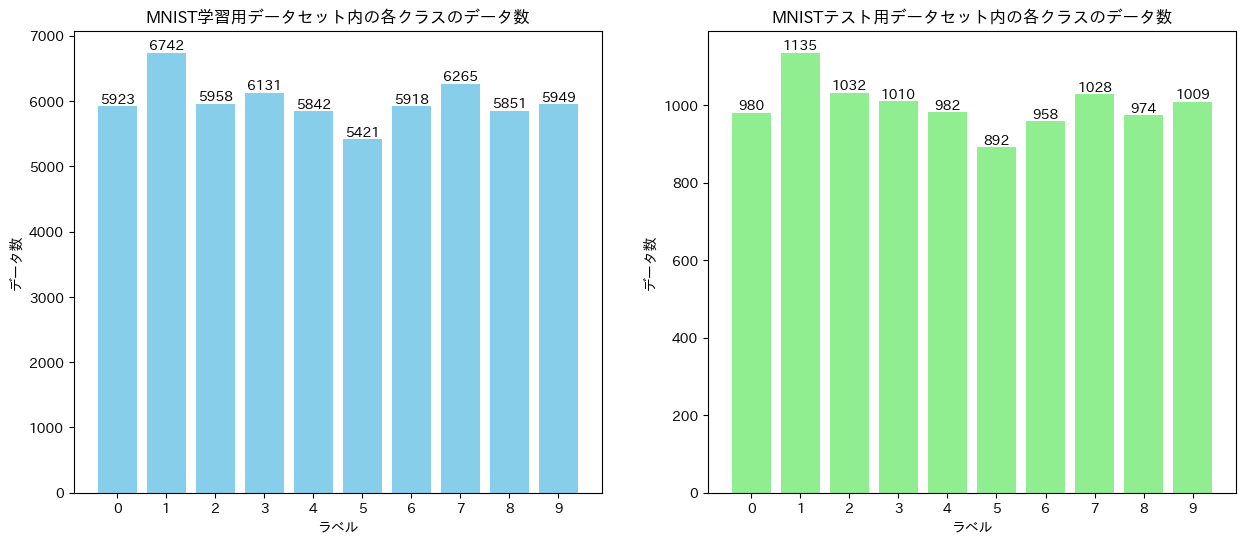

In [5]:
# 学習とテストのデータが各数字いくつくらいあるかを確認する
mn.show_dataset_graph()

0~9の各数字が学習のデータセットでは約6000個、テストのデータセットが  
約1000個入っているのが確認できましたでしょうか？

### サンプルデータの表示　

MNISTデータセットの一部を表示してみましょう。  
これにより、データセットの具体的な内容を視覚的に理解することができます。


In [6]:
# チェックするデータの数
num_samples = 5

mn.display_mnist_samples(n=num_samples)

,画像,ラベル_0,ラベル_1,ラベル_2,ラベル_3,ラベル_4,ラベル_5,ラベル_6,ラベル_7,ラベル_8,ラベル_9
0,,0,0,0,0,0,1,0,0,0,0
1,,1,0,0,0,0,0,0,0,0,0
2,,0,0,0,0,1,0,0,0,0,0
3,,0,1,0,0,0,0,0,0,0,0
4,,0,0,0,0,0,0,0,0,0,1


### 特定の数字のサンプル表示

特定の数字（ここでは7）のサンプルを表示してみましょう。これにより、同じ数字でもさまざまな書き方があることがわかります。  


In [7]:
# チェックするデータの数
num_samples = 10

# チェックする手書きの数字
choose_label_class = 7

mn.display_mnist_samples(choose_label_class, n=num_samples)

,画像,ラベル_0,ラベル_1,ラベル_2,ラベル_3,ラベル_4,ラベル_5,ラベル_6,ラベル_7,ラベル_8,ラベル_9
0,,0,0,0,0,0,0,0,1,0,0
1,,0,0,0,0,0,0,0,1,0,0
2,,0,0,0,0,0,0,0,1,0,0
3,,0,0,0,0,0,0,0,1,0,0
4,,0,0,0,0,0,0,0,1,0,0
5,,0,0,0,0,0,0,0,1,0,0
6,,0,0,0,0,0,0,0,1,0,0
7,,0,0,0,0,0,0,0,1,0,0
8,,0,0,0,0,0,0,0,1,0,0
9,,0,0,0,0,0,0,0,1,0,0


<hr style="border-top: 2px solid #71EB8B;">

## <span style="color:#E5004C"> データセットの前処理 </span>


AIモデルの訓練に適した形式にデータセットを前処理します。  
これには、正規化(0-255の値を0-1の値の範囲に収まるようにする)や形状の調整が含まれます。

In [8]:
# モデルに学習させるために、データセットの前処理を行う
x_train, y_train, x_test, y_test = mn.preprocess()

<hr style="border-top: 2px solid #71EB8B;">

## <span style="color:#E5004C"> AIの構築 </span>
<p style="font-weight: bold; color: black; border: 3px solid #71EB8B; padding: 5px; display: inline-block;">
    参照: スライド 20ページ
</p>

ここでは、ニューラルネットワークモデル(AI)を構築します。AIのアーキテクチャを定義し、学習の準備を行います。  

<span style="color: blue; "> ★ </span> ***やってみよう！***  
スライドを参考に、正しい選択肢を選んでAIを構築してください。  
構築できたら、作ったAIの詳細が表示されます。

<img src="img/work_build_model.png" style="display: inline-block; vertical-align: middle; width: 600px; height: auto;" />

In [10]:
## AIを構築する
mn.build_model()

モデルの詳細がみれたでしょうか？  
詳細がみれたら、最後から4番目あたりから、`Flatten`や`Dense`が最後の方にあるか確認してみましょう。  
なお、最初の部分には、今回は講義で触れていない`Conv2D`や`MaxPooling2D`があると思いますが  
ワークの最後に作るゲームのために、AIの精度を少しでも上げたいので、画像分類に特化したニューラルネットワークを使っているためというのが理由です。  
普通の分類であれば、今回講義で習った`Flatten`と`Dense`の組み合わせでも十分精度を出すことができます。

<hr style="border-top: 2px solid #71EB8B;">

## <span style="color:#E5004C"> AIの学習 </span>

<p style="font-weight: bold; color: black; border: 3px solid #71EB8B; padding: 5px; display: inline-block;">
    参照: スライド 28-29ページ
</p>
<br>
<img src="img/train_ai.png" style="display: inline-block; vertical-align: middle; width: 600px; height: auto;" />
<br>
<img src="img/train_ai_2.png" style="display: inline-block; vertical-align: middle; width: 600px; height: auto;" />

構築したAIを使用して、データセットで学習を行います。  
学習することによって、AIは数字を認識するためのパターンを学びます。

In [11]:
# 構築したAIを使って学習させる
history, model = mn.train(x_train, y_train, x_test, y_test)

Epoch 1/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.2028 - accuracy: 0.9388
-------------------------------------------------------------------------------------------------
エポック 1: 学習時の損失 = 0.2028, 学習時の正解率 = 93.89%, テスト時の損失 = 0.0473, テスト時の正解率 = 98.46%
-------------------------------------------------------------------------------------------------
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2028 - accuracy: 0.9389 - val_loss: 0.0473 - val_accuracy: 0.9846
Epoch 2/100
1858/1875 [============================>.] - ETA: 0s - loss: 0.0837 - accuracy: 0.9746
-------------------------------------------------------------------------------------------------
エポック 2: 学習時の損失 = 0.0838, 学習時の正解率 = 97.46%, テスト時の損失 = 0.0422, テスト時の正解率 = 98.45%
-------------------------------------------------------------------------------------------------
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0838 - accuracy: 0.9746 - val_loss: 0.0422 - val_acc

<hr style="border-top: 2px solid #71EB8B;">

## <span style="color:#E5004C"> AIの評価 </span>  
<p style="font-weight: bold; color: black; border: 3px solid #71EB8B; padding: 5px; display: inline-block;">
    参照: スライド 30-31ページ
</p>
<br>
<img src="img/train_graph.png" style="display: inline-block; vertical-align: middle; width: 600px; height: auto;" />
<br>
<<img src="img/predict_result.png" style="display: inline-block; vertical-align: middle; width: 600px; height: auto;" />>


### 学習過程の可視化
学習の進捗をグラフで確認してモデルを評価します。  
これには、精度(正解率)と損失の推移が含まれ、作ったAIの性能を把握するのに役立ちます。

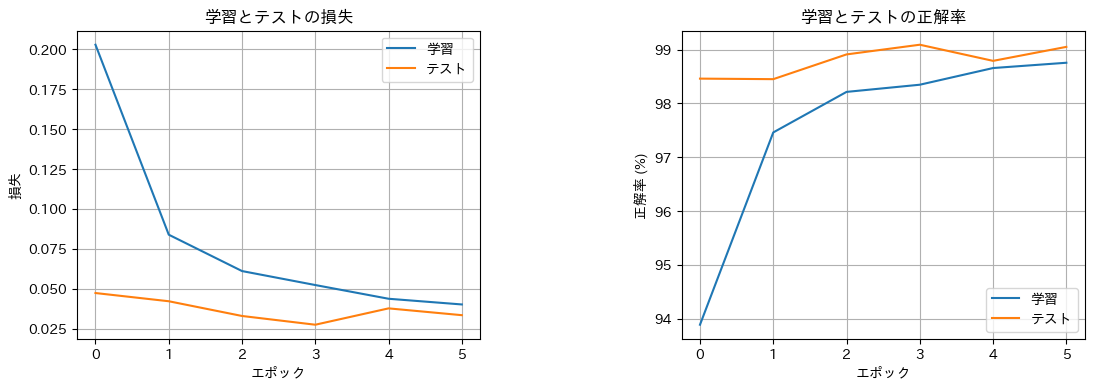

In [12]:
# 学習の経過をグラフで確認する
mn.show_train_graph(history)

学習とテストが両方とも損失が下がっていき、また正解率も良くなっていっていることが確認できたでしょうか？

### テストデータを使った予測

テストデータセットを用いて、学習したモデルの性能を評価します。  
ランダムに選んだサンプルでモデルの予測をテストします。  
何回か実行してみて、予測結果と正解がどれくらい一致するか確認してみてください。

1/1 [==============================] - 0s 121ms/step


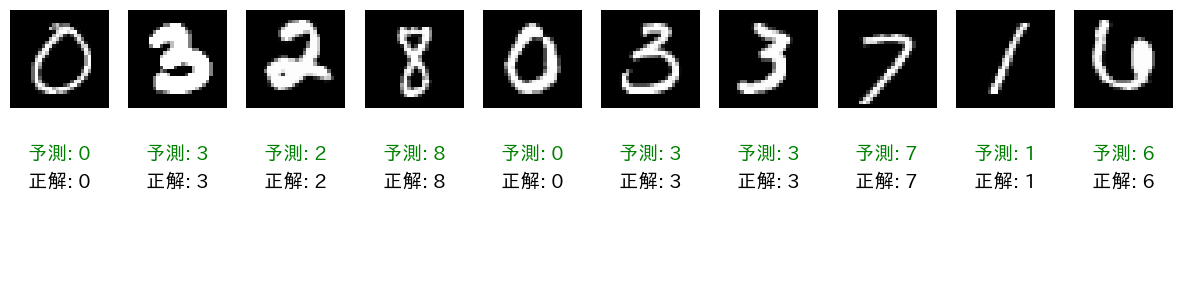

In [13]:
# テストデータから10個ランダムにデータを選択
num_samples = 10  # 表示するテスト結果

mn.predict(num_samples)

<hr style="border-top: 2px solid #71EB8B;">

## 【応用】手書き数字認識ゲームの作成

最後に、Gradioを使用してインタラクティブな手書き数字認識ゲームを作成します。  
下記のコードを実行したら、`Running on public URL`の右側にあるリンクをクリックしてみてください。  
ゲームを開くことができるはずです。  
自分の書いた手書き文字の正答率がスコアになります。 高得点を目指しましょう！


In [14]:
# 必要なライブラリをインポートします
from utils import mnist_game  # ユーティリティライブラリからmnist_gameをインポート
import gradio as gr            # デモアプリを作るために必要なgradioライブラリをインポート
import time                    # 時間関連の操作を行うためにtimeライブラリをインポート

# JavaScriptコードを定義します（ブラウザでのポップアップに使用）
js = "(x) => confirm(x)"

# ゲーム用に使用するクラスを定義します
game = mnist_game.HandwritingGame(model)

# Gradioアプリケーションの構築を開始します
with gr.Blocks(theme=gr.themes.Soft()) as app:
    # ゲームのタイトルと説明を表示します
    gr.Markdown("<div style='text-align: center;'><h1>手書き数字認識ゲーム</h1><h3>1分間に指示された数字を書いて高スコアを狙おう</h3></div>")
    
    # 画面のレイアウトを設定します
    with gr.Row():
        # 画面の左側のレイアウトを設定します
        with gr.Column(scale=5):
            # ユーザー名を入力するためのテキストボックスを作成します
            user_name = gr.Textbox(label="ユーザー名")
            # ゲーム開始とリセットのためのボタンを配置します
            with gr.Row():
                start_button = gr.Button("ゲーム開始", variant="primary")
                reset_button = gr.Button("リセット")
            # ゲームの説明や指示を表示するためのテキストボックスを配置します
            output1 = gr.Textbox(value="「ユーザー名」に名前を入力して「ゲーム開始」ボタンを押してください。", label="説明", interactive=False)
            # ユーザーが数字を描くためのキャンバスを配置します
            image_input = gr.Image(
                source="canvas",
                shape=(200, 200),
                image_mode='L',
                tool='color-sketch',
                invert_colors=True
            ).style(width=800, height=400)
            # 判定とクリアのためのボタンを配置します
            with gr.Row():
                submit_button = gr.Button("判定", variant="primary")
                clear_button = gr.Button("クリア")
            # 判定結果を表示するためのテキストボックスを配置します
            output2 = gr.Textbox(label="結果", interactive=False)
        # 画面の右側のレイアウトを設定します
        with gr.Column(scale=5):
            # モデルの予測結果を表示するためのラベルを配置します
            output3 = gr.Label(label='予測結果', num_top_classes=5, scale=2)
            # スコアボードとランキングを表示するためのテキストボックスを配置します
            with gr.Row():
                score_board = gr.Textbox(label="スコア", value="", lines=15, scale=1)
                total_ranking = gr.Textbox(label="ランキング", value="", lines=15, scale=2)

    # それぞれのボタンに対して、クリックされたタイミングで実行される処理を定義します
    start_button.click(fn=game.start_game, inputs=[output2, user_name, gr.State(False)], outputs=[output1, total_ranking])
    reset_button.click(fn=game.start_game, inputs=[output2, user_name, gr.State(True)], outputs=[output1, total_ranking])
    clear_button.click(fn=lambda x: None, inputs=image_input, outputs=image_input)
    submit_button.click(
        fn=game.recognize_drawing,
        inputs=[output1, output2, image_input],
        outputs=[output1, output2, output3, image_input, score_board]
    )
    # 「説明」のテキストボックスと「結果」のテキストボックスに文字が入力された場合に、実行される処理を定義します
    output1.change(
        fn=None, inputs=output1, outputs=None, _js=js
    )
    output2.change(
        fn=game.start_game, inputs=output2, outputs=[output1, total_ranking], _js=js if time.time() > game.end_time else None
    )

# Gradioアプリケーションを起動します

app.queue().launch(share=True, server_port=7861)

/tmp/ipykernel_20144/4180405681.py:30: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  image_input = gr.Image(


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://9e1f98a12cca1c2523.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 16ms/step
